In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Okay now let's explore what are all the columns.
###  **Data**

1. **Age** : age of the patient
2. **Sex** : sex of the patient
 * 1 = Male
 * 0 = Female
3.  **cp**  : chest pain type

 * Value 0 = typical angina
 * Value 1 = atypical angina
 * Value 2 = non-anginal pain
 * Value 3 =  asymptomatic

4. **trestbps** : resting blood pressure (in mm Hg)
5. **chol**:  cholestoral in mg/dl fetched via BMI sensor
6. **fbs** : fasting blood sugar > 120 mg/dl)
 * 1 = true
 * 0 = false
7. **restecg** : resting electrocardiographic results
 * Value 0: normal
 * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevationor depression of > 0.05 mV)
 * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8.  **thalach** : maximum heart rate achieved
9.  **exang** : exercise induced angina
 * 1 = yes
 * 0 = no
10. **old peak** : ST depression induced by exercise relative to rest
11. **slope** : the slope of the peak exercise ST segment
 * Value 0 = upsloping
 * Value 1 = flat
 * Value 2 = downsloping
12. **ca** : number of major vessels (0-3) colored by flourosopy
13. **thal** :
 * 0 = error (in the original dataset 0 maps to NaN's)
 * 1 = fixed defect
 * 2 = normal
 * 3 = reversable defect
14. **target** : target
 * 0 = no disease
 * 1 = disease


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.rename(columns = {

    'cp' : 'chest pain type',
    'trestbps'  : 'resting blood pressure',
    'chol'  : 'cholestrol',
    'fbs'   : 'fasting blood sugar',
    'thalach': 'max heart rate achieved',
    'exang': 'exercise induced angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca':'num major vessels',
    'thal': 'thalassemia'
},inplace = True)

In [ ]:
df['sex'][df['sex'] == 0] = 'Female'
df['sex'][df['sex'] == 1] = 'Male'

df['chest pain type'][df['chest pain type'] == 0] = 'typical angina'
df['chest pain type'][df['chest pain type'] == 1] = 'atypical angina'
df['chest pain type'][df['chest pain type'] == 2] = 'non-anginal pain'
df['chest pain type'][df['chest pain type'] == 3] = 'asymptomatic'

df['fasting blood sugar'][df['fasting blood sugar'] == 0] = 'False'
df['fasting blood sugar'][df['fasting blood sugar'] == 1] = 'True'

df['restecg'][df['restecg'] == 0] = 'normal'
df['restecg'][df['restecg'] == 1] = 'ST-T wave abnormality'
df['restecg'][df['restecg'] == 2] = 'left ventricular hypertrophy'

df['exercise induced angina'][df['exercise induced angina'] == 0] = 'No'
df['exercise induced angina'][df['exercise induced angina'] == 1] = 'Yes'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 0] = 'error'
df['thalassemia'][df['thalassemia'] == 1] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 2] = 'normal'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

In [ ]:
df.head()

,age,sex,chest pain type,resting blood pressure,cholestrol,fasting blood sugar,restecg,max heart rate achieved,exercise induced angina,st_depression,st_slope,num major vessels,thalassemia,target
0,52,Male,typical angina,125,212,False,ST-T wave abnormality,168,No,1.0,downsloping,2,reversable defect,0
1,53,Male,typical angina,140,203,True,normal,155,Yes,3.1,upsloping,0,reversable defect,0
2,70,Male,typical angina,145,174,False,ST-T wave abnormality,125,Yes,2.6,upsloping,0,reversable defect,0
3,61,Male,typical angina,148,203,False,ST-T wave abnormality,161,No,0.0,downsloping,1,reversable defect,0
4,62,Female,typical angina,138,294,True,ST-T wave abnormality,106,No,1.9,flat,3,normal,0


In [ ]:
df.dtypes

age                          int64
sex                         object
chest pain type             object
resting blood pressure       int64
cholestrol                   int64
fasting blood sugar         object
restecg                     object
max heart rate achieved      int64
exercise induced angina     object
st_depression              float64
st_slope                    object
num major vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [ ]:
num_features = ['age','resting blood pressure','cholestrol','max heart rate achieved','st_depression','num major vessels']
bin_cat_features = ['sex','fasting blood sugar','exercise induced angina']
multi_cat_features = ['chest pain type','restecg','st_slope','thalassemia']
cat_features = bin_cat_features+multi_cat_features

In [ ]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

Text(0.5, 1.0, 'Target variable distribution')

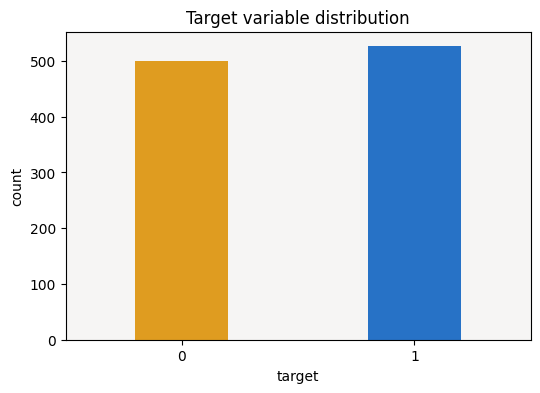

In [ ]:
color= ['#FFA500','#0C71E0']

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['target'], palette=color[0::1],width=0.4)
ax.set_facecolor('#F6F5F4')
plt.title('Target variable distribution')

In [ ]:
df.head()

,age,sex,chest pain type,resting blood pressure,cholestrol,fasting blood sugar,restecg,max heart rate achieved,exercise induced angina,st_depression,st_slope,num major vessels,thalassemia,target
0,52,Male,typical angina,125,212,False,ST-T wave abnormality,168,No,1.0,downsloping,2,reversable defect,0
1,53,Male,typical angina,140,203,True,normal,155,Yes,3.1,upsloping,0,reversable defect,0
2,70,Male,typical angina,145,174,False,ST-T wave abnormality,125,Yes,2.6,upsloping,0,reversable defect,0
3,61,Male,typical angina,148,203,False,ST-T wave abnormality,161,No,0.0,downsloping,1,reversable defect,0
4,62,Female,typical angina,138,294,True,ST-T wave abnormality,106,No,1.9,flat,3,normal,0


In [ ]:
heart_disease_df    = df[df['target'] ==1]
no_heart_disease_df = df[df['target'] ==0]

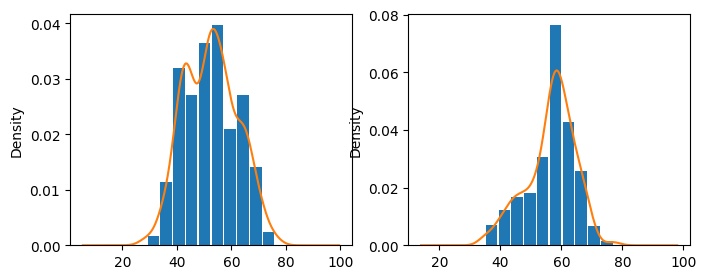

In [ ]:
plt.rcParams["figure.figsize"] = [8,3]

fig, axes = plt.subplots(1, 2)
heart_disease_df['age'].hist(bins=10,rwidth=0.9,density = True,ax=axes[0])
heart_disease_df['age'].plot(kind = "kde",ax=axes[0])
no_heart_disease_df['age'].hist(bins=10,rwidth=0.9,density = True,ax=axes[1])
no_heart_disease_df['age'].plot(kind = "kde",ax=axes[1])
plt.show()

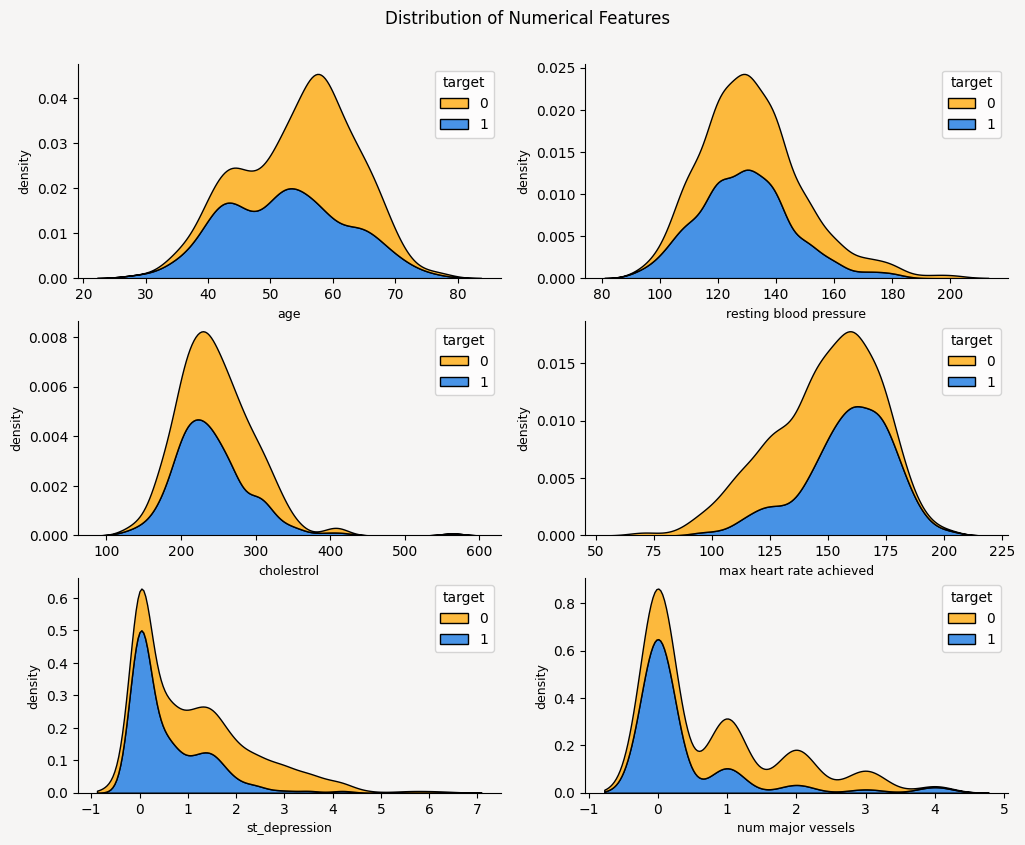

In [ ]:
L = len(num_features)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(12, 9),facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92)

i = 1
for col in num_features:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
    ax = sns.kdeplot(data=df, x=col, hue="target", multiple="stack", palette=color[0::1])
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel("density", fontsize=9)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    i = i +1
plt.suptitle('Distribution of Numerical Features' ,fontsize = 12);

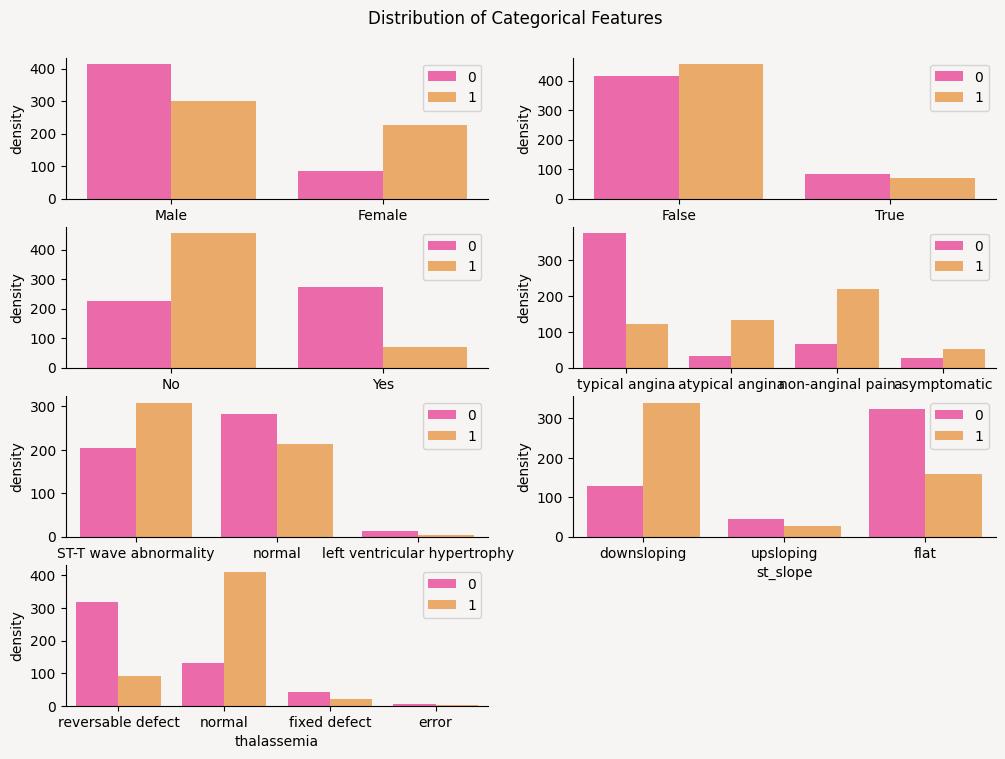

In [ ]:
L = len(cat_features)
ncol= 2
nrow= int(np.ceil(L/ncol))
remove_last= (nrow * ncol) - L

plt.rcParams["figure.figsize"] = [12,8]
fig, ax = plt.subplots(nrow, ncol, facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92)
ax.flat[-remove_last].set_visible(False)
color = 'spring'

i = 1
for col in cat_features:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
    ax = sns.countplot(data=df, x=col, hue="target", palette=color[0::1])
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("density", fontsize=10)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    plt.legend(facecolor='#F6F5F4')
    # plt.xticks(rotation = 90)
    i = i +1
plt.suptitle('Distribution of Categorical Features' ,fontsize = 12);

In [ ]:
# 1. Correlation heatmap
# 2. one hot encoding
# 3. check skewness

In [ ]:
!pip3 install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


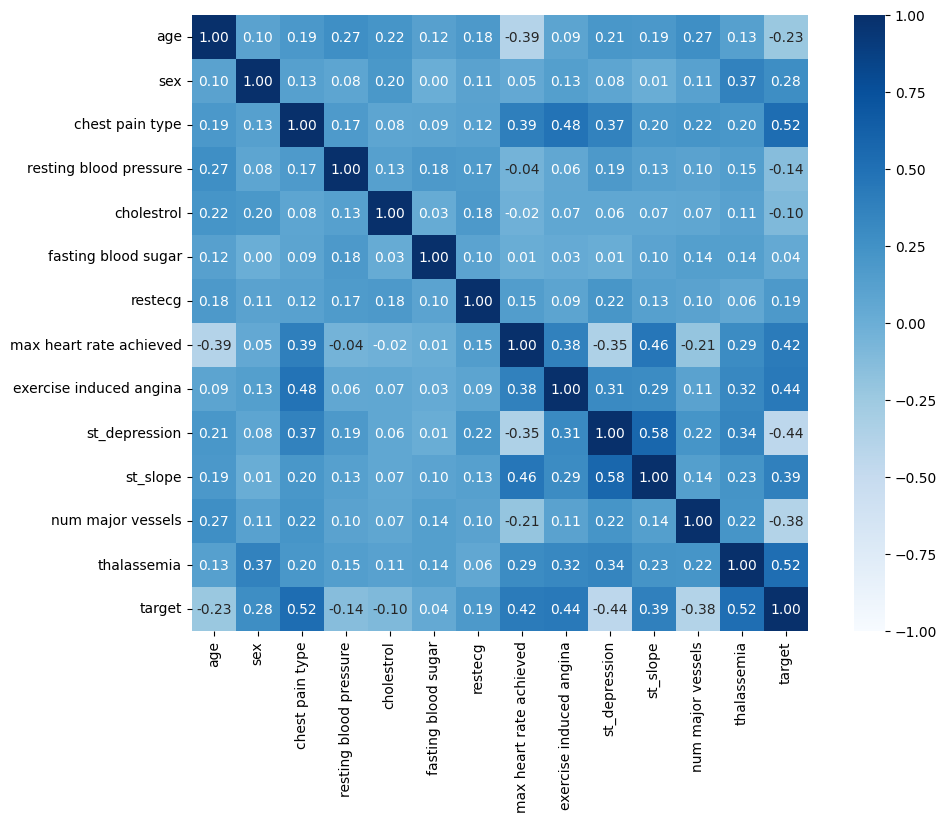

In [ ]:
from dython.nominal import associations

fig, ax = plt.subplots(figsize=(12, 8))
r = associations(df, ax = ax, cmap = "Blues")
plt.show()

# corr_map_df = df.drop('target',axis=1)
# sns.heatmap(df.corr(),annot=True,cmap = "Blues")

In [ ]:
sex = pd.get_dummies(df.sex,prefix='sex',drop_first=True)
chest_pain_type = pd.get_dummies(df['chest pain type'],prefix = 'chest_pain_type',drop_first=True)
fasting_blood_sugar = pd.get_dummies(df['fasting blood sugar'],prefix = 'fasting_blood_sugar',drop_first=True)
restecg = pd.get_dummies(df['restecg'],prefix = 'restecg',drop_first=True)
exercise_induced_angina =  pd.get_dummies(df['exercise induced angina'],prefix = 'exercise_induced_angina',drop_first=True)
st_slope = pd.get_dummies(df['st_slope'],prefix = 'st_slope',drop_first=True)
thalassemia = pd.get_dummies(df['thalassemia'],prefix = 'thalassemia',drop_first=True)

df.drop(['sex','chest pain type','fasting blood sugar','restecg','exercise induced angina','st_slope','thalassemia'],axis=1,inplace=True)
df = pd.concat([df,sex,chest_pain_type,fasting_blood_sugar,restecg,exercise_induced_angina,st_slope,thalassemia],axis=1)
df.head()

,age,resting blood pressure,cholestrol,max heart rate achieved,st_depression,num major vessels,target,sex_Male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_True,restecg_left ventricular hypertrophy,restecg_normal,exercise_induced_angina_Yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,52,125,212,168,1.0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1
2,70,145,174,125,2.6,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1
3,61,148,203,161,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,0,1,1,0,0,0,1,0,0,1,0


In [ ]:
df.shape

(1025, 20)

In [ ]:
X = df.drop(columns = {'target'})
Y = df.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 10)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


log_r = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC(probability=True)
knn = KNeighborsClassifier()
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier(probability=True)
lgbm = LGBMClassifier()

names = ['Logistic Regression','Decision Tree','Random Forest','SVM','KNN','AdaBoost','Gradient Boost','XGBoost','LightGBM']
clfs = [log_r,dt,rf,svc,knn,ada,gb,xgb,lgbm]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


def score_summary(names, classifiers):

    cols=["Classifier", "Accuracy", "Precision","Recall","F1 Score"]
    model_scores = pd.DataFrame(columns=cols)

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)
        pred_proba = clf.predict_proba(X_test)[:, 1]
        accuracy = accuracy_score(Y_test, Y_pred)
        precision = precision_score(Y_test, Y_pred)
        recall = recall_score(Y_test, Y_pred)
        f1 = 2*recall*precision/(recall + precision)

        df = pd.DataFrame([[name, accuracy*100, precision,recall,f1]], columns=cols)
        model_scores = model_scores.append(df)

    return(np.round(model_scores.reset_index(drop=True), 2))

score_summary(names, clfs).sort_values(by='Accuracy' , ascending = False)

[08:18:13] WARNING: ../src/learner.cc:767: 
Parameters: { "probability" } are not used.



,Classifier,Accuracy,Precision,Recall,F1 Score
1,Decision Tree,100.00,1.00,1.00,1.00
2,Random Forest,100.00,1.00,1.00,1.00
7,XGBoost,100.00,1.00,1.00,1.00
8,LightGBM,100.00,1.00,1.00,1.00
6,Gradient Boost,95.12,0.95,0.96,0.95
5,AdaBoost,91.71,0.92,0.93,0.92
0,Logistic Regression,84.39,0.85,0.85,0.85
4,KNN,74.15,0.76,0.74,0.75
3,SVM,67.80,0.66,0.81,0.73


[08:18:15] WARNING: ../src/learner.cc:767: 
Parameters: { "probability" } are not used.



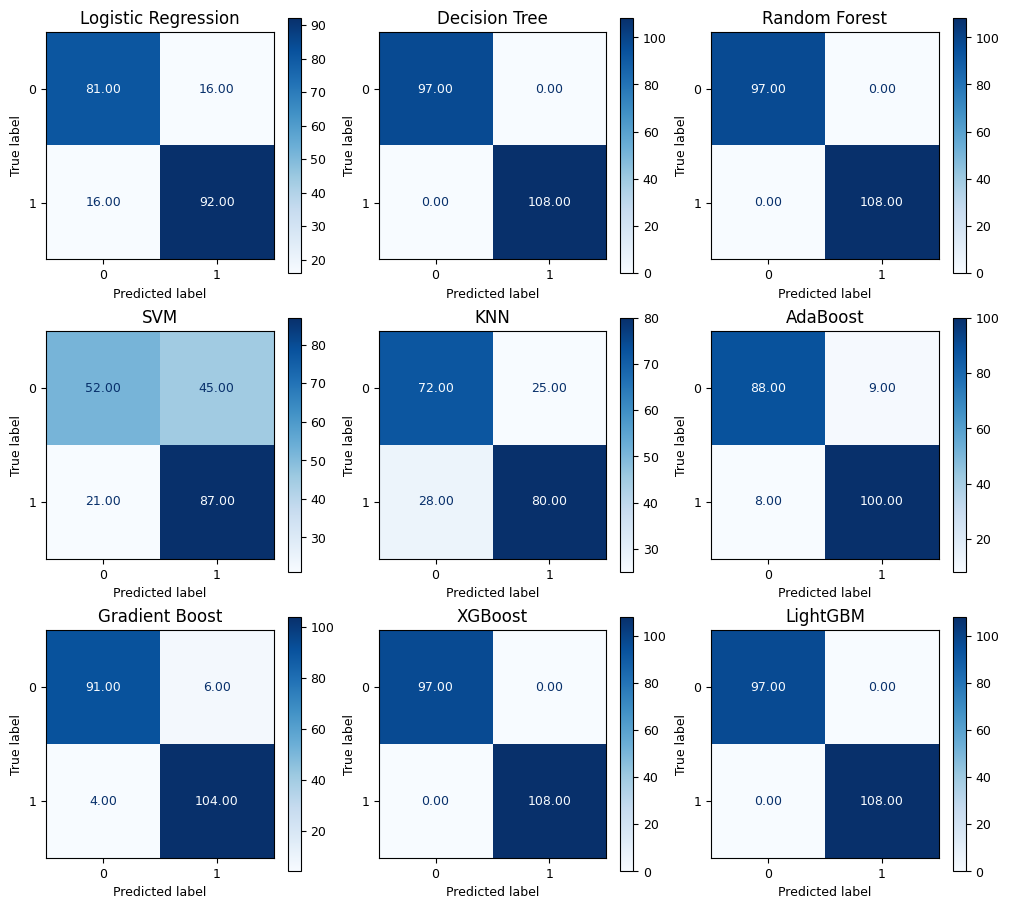

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix


plt.rcParams.update({'font.size':9})
labels = ['0','1']
colorbar = True
cmap = 'Blues'
values_format = ".2f"
k = 0

f, axes = plt.subplots(3, 3, figsize=(10,9))

for i in range(0,3):
  for j in range(0,3):
      clfs[k].fit(X_train,Y_train)
      Y_pred = clfs[k].predict(X_test)
      axes[i, j].set_title(names[k], size=12)
      ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred), display_labels=labels).plot(include_values=True, cmap=cmap, ax=axes[i, j], colorbar=colorbar, values_format=values_format)
      k+=1

f.tight_layout(pad=0.2)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


xgb = XGBClassifier(probability=True)
xgb.fit(X_train,Y_train)
Y_pred = xgb.predict(X_test)
print(classification_report(Y_test, Y_pred))
confusion_matrix(Y_test, Y_pred)

[08:18:17] WARNING: ../src/learner.cc:767: 
Parameters: { "probability" } are not used.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       108

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



array([[ 97,   0],
       [  0, 108]])

[0.0608608  0.05541353 0.05521613 0.07223441 0.06724079 0.09787472
 0.03797787 0.01743012 0.0389517  0.10700997 0.01665159 0.00197492
 0.03041148 0.06599475 0.05800393 0.00973728 0.00612842 0.12789805
 0.07298956]


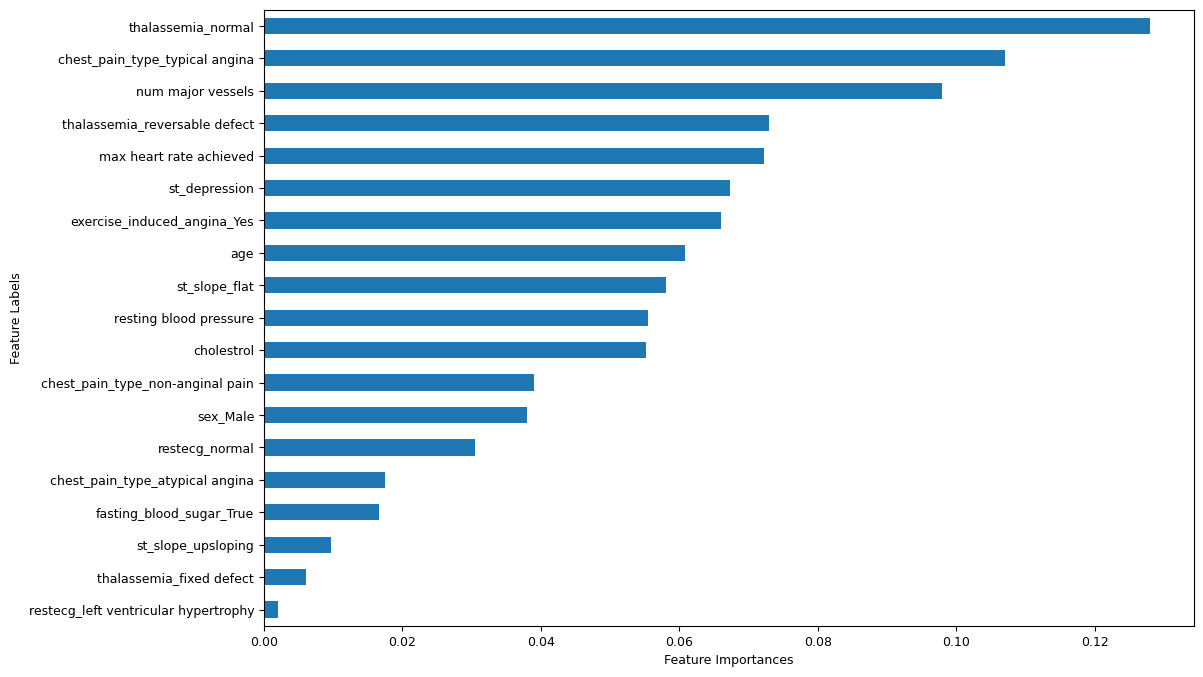

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree_forest = ExtraTreesClassifier(n_estimators=100)
extra_tree_forest.fit(X_train,Y_train)

X = pd.DataFrame(X_train)
print(extra_tree_forest.feature_importances_)

feat_importances = pd.Series(extra_tree_forest.feature_importances_, index=X.columns)
feat_importances.nsmallest(30).plot(kind='barh')
plt.xlabel('Feature Importances')
plt.ylabel('Feature Labels')
plt.show()